<a href="https://colab.research.google.com/github/priyankkumar218/MISC/blob/master/DA11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Bank Marketing Analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/priyankkumar218/MISC/master/bank-additional-full.csv', sep=';', na_values='unknown')

In [6]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
dataset.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
missing_cond = dataset.isnull().sum() != 0
missing_cond

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [9]:
miss_col_ind = np.where(missing_cond)[0]
miss_col_ind

array([1, 2, 3, 4, 5, 6])

In [10]:
miss_cols = list(dataset.columns[miss_col_ind])
miss_cols

['job', 'marital', 'education', 'default', 'housing', 'loan']

In [11]:
dataset['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [12]:
dataset['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [13]:
missing_column_freq = []
for i in miss_col_ind:
  missing_column_freq.append(dataset.iloc[:, i].value_counts())

missing_column_freq

[admin.           10422
 blue-collar       9254
 technician        6743
 services          3969
 management        2924
 retired           1720
 entrepreneur      1456
 self-employed     1421
 housemaid         1060
 unemployed        1014
 student            875
 Name: job, dtype: int64, married     24928
 single      11568
 divorced     4612
 Name: marital, dtype: int64, university.degree      12168
 high.school             9515
 basic.9y                6045
 professional.course     5243
 basic.4y                4176
 basic.6y                2292
 illiterate                18
 Name: education, dtype: int64, no     32588
 yes        3
 Name: default, dtype: int64, yes    21576
 no     18622
 Name: housing, dtype: int64, no     33950
 yes     6248
 Name: loan, dtype: int64]

In [0]:
# Null Value Estimation
dataset_miss = dataset[miss_cols]

In [15]:
dataset_miss.isnull().sum()

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

In [16]:
for i in range(6):
  missing_column_freq[i]= missing_column_freq[i].append(pd.Series({'null':dataset_miss.isnull().sum()[i]}))

missing_column_freq

[admin.           10422
 blue-collar       9254
 technician        6743
 services          3969
 management        2924
 retired           1720
 entrepreneur      1456
 self-employed     1421
 housemaid         1060
 unemployed        1014
 student            875
 null               330
 dtype: int64, married     24928
 single      11568
 divorced     4612
 null           80
 dtype: int64, university.degree      12168
 high.school             9515
 basic.9y                6045
 professional.course     5243
 basic.4y                4176
 basic.6y                2292
 illiterate                18
 null                    1731
 dtype: int64, no      32588
 yes         3
 null     8597
 dtype: int64, yes     21576
 no      18622
 null      990
 dtype: int64, no      33950
 yes      6248
 null      990
 dtype: int64]

In [17]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


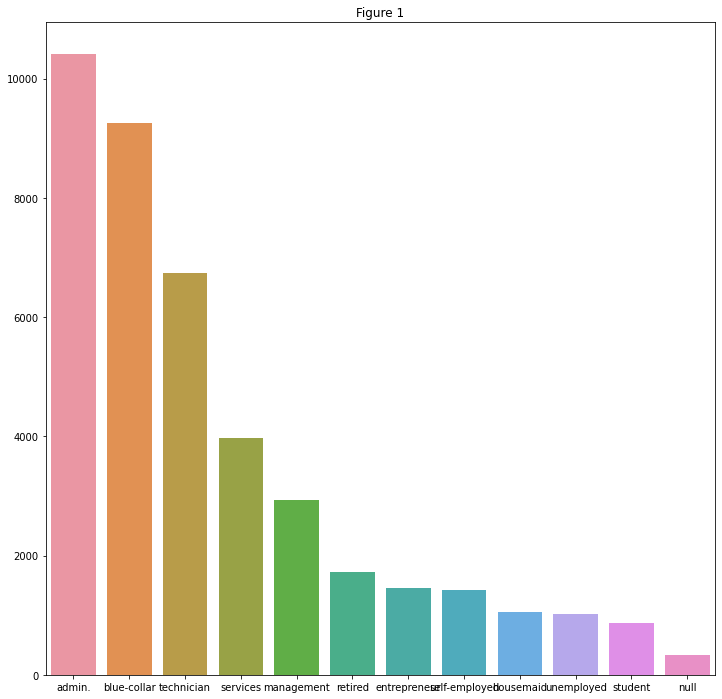

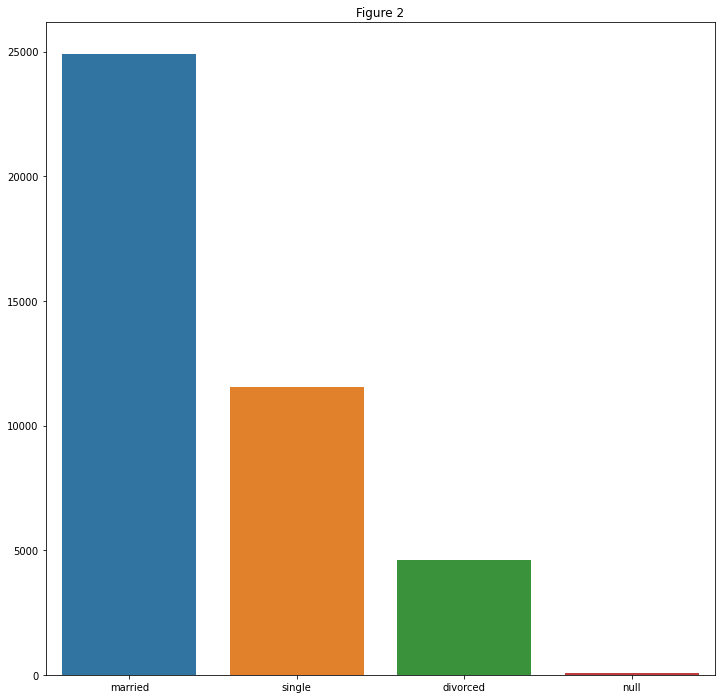

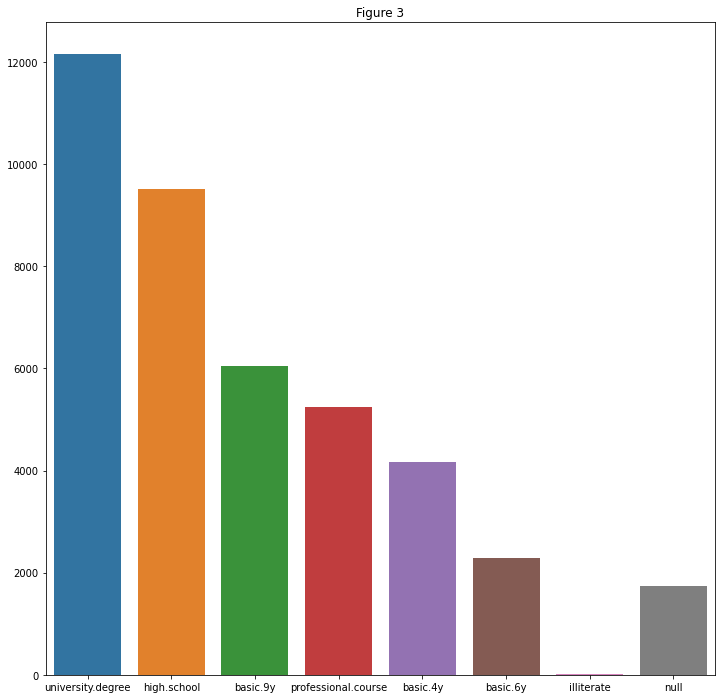

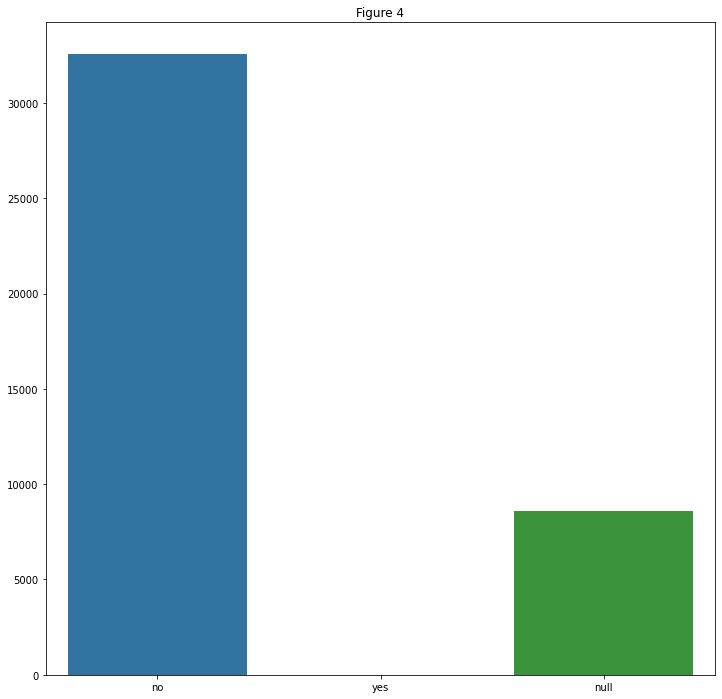

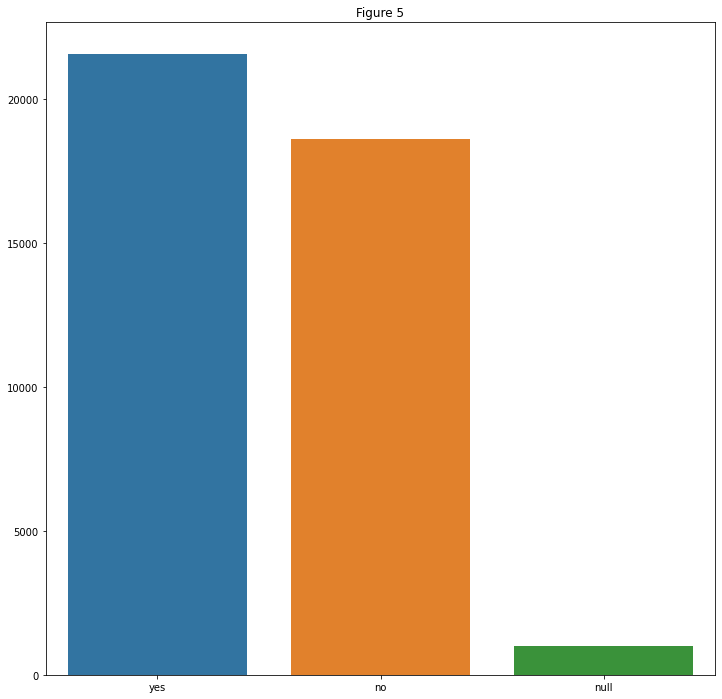

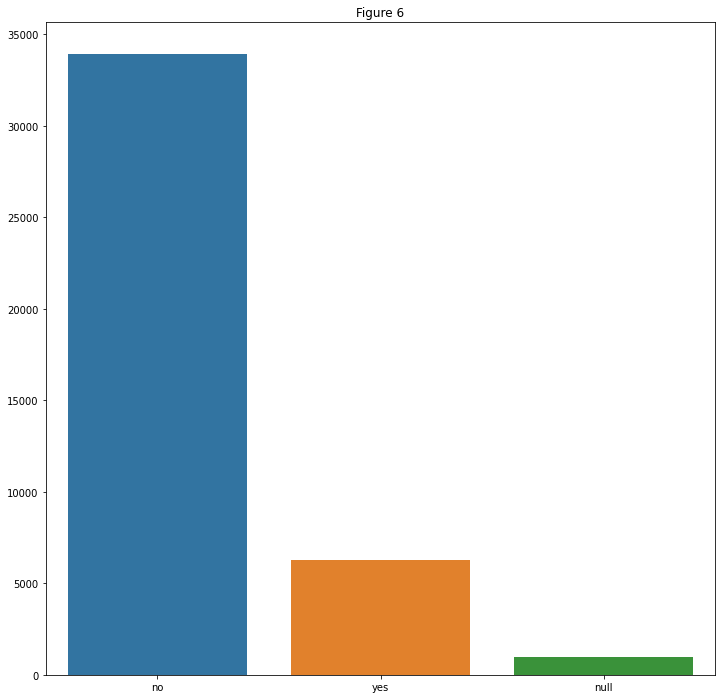

In [19]:
for i in range(6):
  plt.figure(figsize=(12, 12))
  plt.title("Figure {}".format(i+1))
  sns.barplot(missing_column_freq[i].index, missing_column_freq[i].values)
  plt.show()

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
sim = SimpleImputer(strategy='most_frequent')

In [22]:
sim.fit(dataset_miss)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [23]:
sim.statistics_

array(['admin.', 'married', 'university.degree', 'no', 'yes', 'no'],
      dtype=object)

In [0]:
dataset_miss = pd.DataFrame(sim.transform(dataset_miss))

In [25]:
dataset_miss.isnull()

,0,1,2,3,4,5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
41183,False,False,False,False,False,False
41184,False,False,False,False,False,False
41185,False,False,False,False,False,False
41186,False,False,False,False,False,False


In [0]:
dataset1 = dataset.copy()

In [27]:
dataset1.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [0]:
dataset1[miss_cols] = dataset_miss

In [29]:
dataset1.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

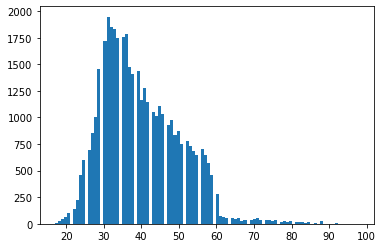

In [34]:
# Histogram Analysis
plt.hist(dataset1['age'], bins=100)
plt.show()

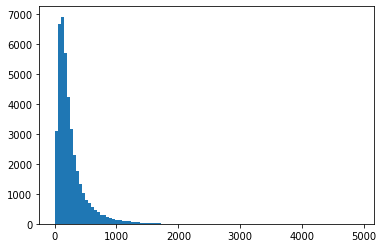

In [35]:
plt.hist(dataset1['duration'], bins=100)
plt.show()

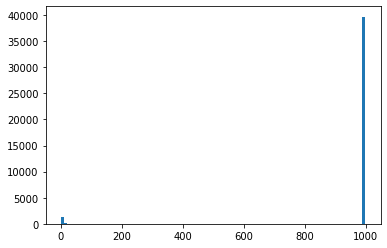

In [36]:
plt.hist(dataset1['pdays'], bins=100)
plt.show()

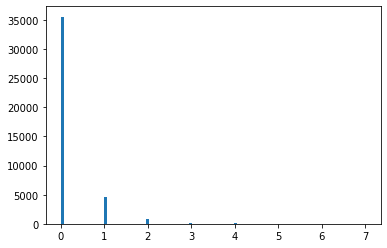

In [37]:
plt.hist(dataset1['previous'], bins=100)
plt.show()

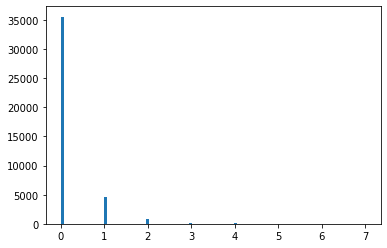

In [38]:
plt.hist(dataset1['previous'], bins=100)
plt.show()

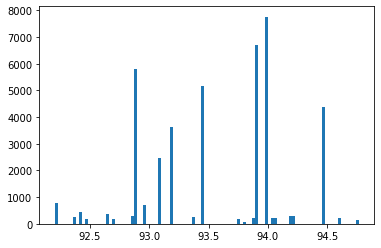

In [39]:
plt.hist(dataset1['cons.price.idx'], bins=100)
plt.show()

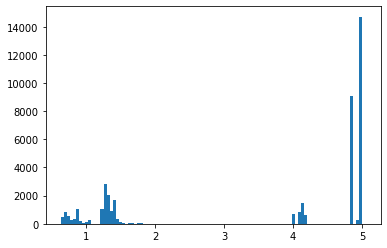

In [40]:
plt.hist(dataset1['euribor3m'], bins=100)
plt.show()

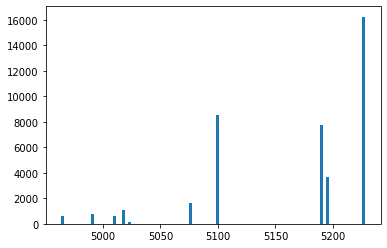

In [41]:
plt.hist(dataset1['nr.employed'], bins=100)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd03c46f9e8>,
      dtype=object)

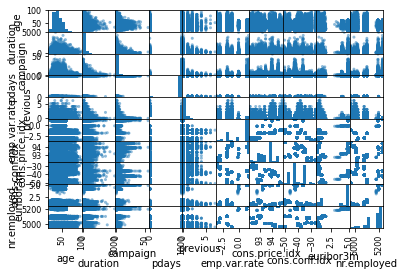

In [42]:
#Correlation between all the Integer columns
pd.plotting.scatter_matrix(dataset1) # Dirty Plot - No Correlation

In [0]:
corr_mat = dataset1.corr()

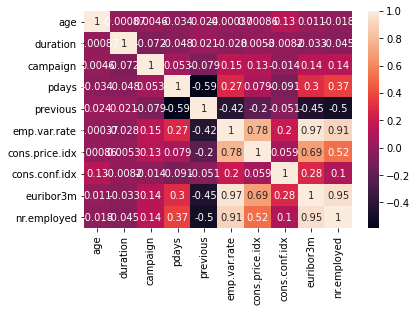

In [44]:
sns.heatmap(corr_mat, annot=True)